# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [5]:
import sklearn
sklearn.__version__

'0.24.0'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [6]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False, version=1)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X.values[shuffle], Y.values[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

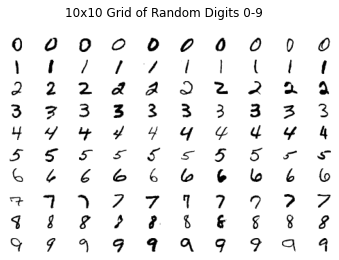

In [7]:
def P1(n_size):

    ### STUDENT START ###

    # Initialize plot
    fig = plt.figure()
    fig.suptitle("10x10 Grid of Random Digits 0-9") 

    # Create n_size number of rows 
    for row in range(n_size):

        # Get maxtrix cords where value is equal to int: row
        row_results_list = np.argwhere(train_labels ==str(row))

        # Used to give the subplots an unique index(ID) 
        count = 1

        for image_coords in row_results_list[:n_size]:

            # Reshape 1D into graysclae values into a 28x28 grid
            digit = np.reshape(train_data[image_coords], (28, 28)) 

            # Quick forumala create the subplot index
            sp_index = (row*10)+count

            # Create the subplot
            axes = fig.add_subplot(n_size, 
                                   n_size,
                                   sp_index,
                                   xlabel=str(row),
                                  )

            # Remove the box boundaries and axis from the subplot
            axes.set_axis_off() 

            # Set to grayscale color output for the subplot
            axes.imshow(digit, cmap='gray_r')

            count += 1

    ### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [8]:
def P2(k_values):

### STUDENT START ###
    
    
    for k in k_values:
        
        # Initialize Classifier with k neighboors
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the model using mini partition
        knn.fit(mini_train_data, mini_train_labels) 
        
        # Predict using dev partition
        pred = knn.predict(dev_data)
        

#         accuracy_count = 0
        
#         for j in range(pred.shape[0]):
#             if pred[j] == dev_labels[j]: #if label is correct, add 1
#                 accuracy_count += 1
#             else:
#                 continue

        # Classification report when K= 1
        if k==1:
            print("Classification report for K:1")
            print(classification_report(dev_labels, pred)) 
        
        print(f"K-Value: {k} - Mean Accuracy: {knn.score(dev_data, dev_labels)}")
        
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification report for K:1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

K-Value: 1 - Mean Accuracy: 0.884
K-Value: 3 - Mean Accuracy: 0.876
K-Value: 5 - Mean Accuracy: 0.882
K-Value: 7 - Mean Accuracy: 0.877
K-Value: 9 - Mean Accuracy: 0.875


#### ANSWER: A 9 is the most dificult digit for the classfier to recognize based on the lowest F1 Score of .82

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [12]:
import time

def P3(train_sizes, accuracies):

    ### STUDENT START ###
    k=1
    
    # Create, fit, and measure performance of KNN for each train_size
    for train_size in train_sizes:
        
        # Initialize Classifier with k neighboors
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Split the training set
        training_data = train_data[:train_size]
        training_labels = train_labels[:train_size]
        
        # Fit the model using mini partition
        knn.fit(training_data, training_labels)
        
        # Make predictions on dev partition
        pred = knn.predict(dev_data)
        
        # Start timer
        start_time = time.time()
        
        # Get the mean accurary
        knn.score(dev_data, dev_labels)
        
        # Stop timer
        end_time = time.time()

        print(f"Training Size: {train_size} - Mean Accuracy{knn.score(dev_data, dev_labels)} - Performance Time: {end_time-start_time}")
        accuracies.append([train_size, knn.score(dev_data, dev_labels)])
        
    
    return accuracies
    ### STUDENT END ###
    


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
accuracies = P3(train_sizes, accuracies)


Training Size: 100 - Mean Accuracy0.702 - Performance Time: 0.03125309944152832
Training Size: 200 - Mean Accuracy0.791 - Performance Time: 0.031043052673339844
Training Size: 400 - Mean Accuracy0.811 - Performance Time: 0.033229827880859375
Training Size: 800 - Mean Accuracy0.866 - Performance Time: 0.035863399505615234
Training Size: 1600 - Mean Accuracy0.905 - Performance Time: 0.05454754829406738
Training Size: 3200 - Mean Accuracy0.927 - Performance Time: 0.08247661590576172
Training Size: 6400 - Mean Accuracy0.939 - Performance Time: 0.1526637077331543
Training Size: 12800 - Mean Accuracy0.952 - Performance Time: 0.2567329406738281
Training Size: 25600 - Mean Accuracy0.963 - Performance Time: 0.4931778907775879


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

0 [1.23617317]
Training Size: 60000 - Predicted Accuracy[1.23617317]
1 [1.63742805]
Training Size: 120000 - Predicted Accuracy[1.63742805]
2 [7.52249967]
Training Size: 1000000 - Predicted Accuracy[7.52249967]
Score: 0.4177006634161019
Coefficients: 
 [[6.68758138e-06]]
Mean squared error: 0.00
Coefficient of determination(R2 Score): 0.42


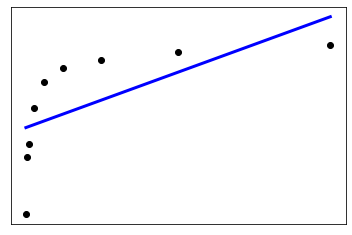

0 [0.04931846]
Transformation - Training Size: 60000 - Predicted Accuracy[0.04931846]
1 [0.08567587]
Transformation - Training Size: 120000 - Predicted Accuracy[0.08567587]
2 [0.19688933]
Transformation - Training Size: 1000000 - Predicted Accuracy[0.19688933]
Transformation - Score: 0.8825621968324606
Transformation - Coefficients: 
 [[0.05245266]]
Transformation - Mean squared error: 0.00
Transformation - Coefficient of determination(R2 Score): 0.88


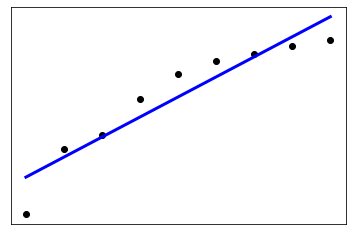

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

def P4(accuracies_list, training_sizes):

    ### STUDENT START ###
    regr = LinearRegression()
    
    accuracy_X = []
    accuaracy_y = []
    
    # Split the dataset into data and labels
    for result in accuracies:
        accuracy_X.append(result[0])
        accuaracy_y.append(result[1])
        
    accuracy_X_array = np.asarray(accuracy_X).reshape(-1, 1)
    accuaracy_y_array = np.asarray(accuaracy_y).reshape(-1, 1)
    
    ##################################################################################
    # Reshape prediction sizes
    accuaracy_X_pred = np.asarray(training_sizes).reshape(-1, 1)
    
    regr.fit(accuracy_X_array, accuaracy_y_array)
    
    accuaracy_y_pred = regr.predict(accuaracy_X_pred)
    
    for index, result in enumerate(accuaracy_y_pred):
        
        print(index, result)
        print(f"Training Size: {training_sizes[index]} - Predicted Accuracy{result}")
    
    ##################################################################################
    
    
    accuaracy_y_pred = regr.predict(accuracy_X_array)
    
    print(f"Score: {regr.score(accuracy_X_array, accuaracy_y_array)}")
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(accuaracy_y_array, accuaracy_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination(R2 Score): %.2f'
          % r2_score(accuaracy_y_array, accuaracy_y_pred))

    # Plot outputs
    plt.scatter(accuracy_X_array, accuaracy_y_array,  color='black')
    plt.plot(accuracy_X_array, accuaracy_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    
    
    ########################################################################
    ##
    ## Log transformation
    ##
    ########################################################################
    
    accuracy_X_log  = np.log(accuracy_X).reshape(-1, 1)
    accuaracy_y_log = np.log(accuaracy_y).reshape(-1, 1)
    
    
    regr.fit(accuracy_X_log, accuaracy_y_log)
    
    ##################################################################################
    # Reshape prediction sizes
    accuaracy_X_pred = np.log(training_sizes).reshape(-1, 1)
        
    accuaracy_y_pred = regr.predict(accuaracy_X_pred)
    
    for index, result in enumerate(accuaracy_y_pred):
        
        print(index, result)
        print(f"Transformation - Training Size: {training_sizes[index]} - Predicted Accuracy{result}")
    
    ##################################################################################
    
    
    accuaracy_y_pred_log = regr.predict(accuracy_X_log)

    
    print(f"Transformation - Score: {regr.score(accuracy_X_log, accuaracy_y_log)}")
    
    # The coefficients
    print('Transformation - Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Transformation - Mean squared error: %.2f'
          % mean_squared_error(accuaracy_y_log, accuaracy_y_pred_log))
    # The coefficient of determination: 1 is perfect prediction
    print('Transformation - Coefficient of determination(R2 Score): %.2f'
          % r2_score(accuaracy_y_log, accuaracy_y_pred_log))

    # Plot outputs
    plt.scatter(accuracy_X_log, accuaracy_y_log,  color='black')
    plt.plot(accuracy_X_log, accuaracy_y_pred_log, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    

    ### STUDENT END ###

accuracies_list = accuracies
training_sizes = [60000, 120000,1000000]
P4(accuracies_list, training_sizes)

ANSWER:

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

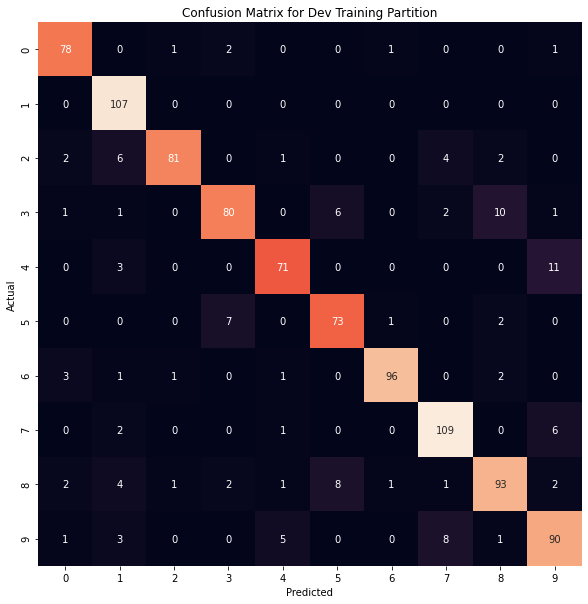

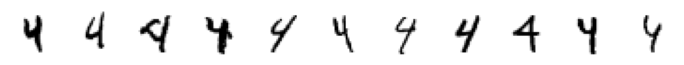

In [199]:
import seaborn as sns
from sklearn.metrics import f1_score

def P5():

    ### STUDENT START ###

    # Initialize KNN classifier with K:1
    knn = KNeighborsClassifier(n_neighbors=1)

    # Fit the classifier using the mini data partition
    knn.fit(mini_train_data, mini_train_labels)

    # Evaluate classifier on the dev data set
    pred = knn.predict(dev_data)

    # Plot confusion matrix using Seaborn Heatmap
    # SNS Heatmap documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
    fig, ax = plt.subplots(figsize=(20,10)) 
    sns.heatmap(confusion_matrix(dev_labels, pred),square=True, annot=True, ax=ax, cbar=False, fmt="d")
    ax.set_title('Confusion Matrix for Dev Training Partition')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()
    plt.close()
    
#     f1_scores = f1_score(dev_labels, pred, average=None)
    
#     for i in range(10):
#         print(f"Digit: {i} - F1 Score: {f1_scores[i]}")

    
    ############################## Plot the incorrect values###############################

    
    # Get the indexs of all the 4s in the dev_labels partition
    valid_nines_indicies = np.argwhere(dev_labels=='4').flatten()
    
    # get the indexs of all the 9s in the pred partition
    preditected_fours_indicies = np.argwhere(pred=='9').flatten()
    
    # Get theintersection of the 2 list which contain the indicies of all the 4s classified as 9s
    incorrect_indicies = list(set(valid_nines_indicies) & set(preditected_fours_indicies))
    
    # Create a new plot
    fig2, axes = plt.subplots(1, len(incorrect_indicies), figsize=(12,2))
    
    # Iterate through all the indices and plot the data
    for index, value in enumerate(incorrect_indicies):

        digit = np.reshape(dev_data[value], (28, 28)) 
        axes[index].set_axis_off() 
        axes[index].imshow(digit, cmap='gray_r')
    
    fig2.show()
        
    ### STUDENT END ###
P5()

#### ANSWER: From the confusion matrix  it is fours that are predicted to be nines that is confused the most often.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [0]:
#def P6():
    
### STUDENT START ###


### STUDENT END ###

#P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [0]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [0]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

ANSWER:

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [0]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#P9()

ANSWER:

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

In [0]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [0]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

ANSWER:

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()